In [1]:
import numpy as np
import torch

from train import TrainerDeepSVDD

from preprocess import get_mnist
from preprocess import get_mvtec

In [2]:
class Args:

    num_epochs=10
    num_epochs_ae=10
    patience=50
    lr=1e-4
    weight_decay=0.5e-6
    weight_decay_ae=0.5e-3
    lr_ae=1e-4
    lr_milestones=[50]
    batch_size=200
    pretrain=True
    latent_dim=32
    normal_class=1
    mvtec_dir = './data/mvtec_new'

    
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # mnist datset
# data = get_mnist(args)

# mvtec dataset(custom dataset)
data = get_mvtec(args.mvtec_dir)
deep_SVDD = TrainerDeepSVDD(args, data, device)

if args.pretrain:
    deep_SVDD.pretrain()

  32/2363: [>...............................] - ETA 0.0storch.Size([32, 2, 4, 4])
  64/2363: [>...............................] - ETA 69.8storch.Size([32, 2, 4, 4])
  96/2363: [>...............................] - ETA 68.9storch.Size([32, 2, 4, 4])
 128/2363: [=>..............................] - ETA 67.9storch.Size([32, 2, 4, 4])
 160/2363: [=>..............................] - ETA 67.0storch.Size([32, 2, 4, 4])
 192/2363: [==>.............................] - ETA 66.0storch.Size([32, 2, 4, 4])
 224/2363: [==>.............................] - ETA 65.0storch.Size([32, 2, 4, 4])
 256/2363: [===>............................] - ETA 64.1storch.Size([32, 2, 4, 4])
 288/2363: [===>............................] - ETA 63.1storch.Size([32, 2, 4, 4])
 320/2363: [===>............................] - ETA 62.2storch.Size([32, 2, 4, 4])
 352/2363: [====>...........................] - ETA 61.2storch.Size([32, 2, 4, 4])
 384/2363: [====>...........................] - ETA 60.3storch.Size([32, 2, 4, 4])
 416/

In [3]:
deep_SVDD.train()

2363/2363: [===============================>] - ETA 0.6ss
Training Deep SVDD... Epoch: 0, Loss: 236.664
2363/2363: [===============================>] - ETA 0.5ss
Training Deep SVDD... Epoch: 1, Loss: 12.832
2363/2363: [===============================>] - ETA 0.5ss
Training Deep SVDD... Epoch: 2, Loss: 8.019
2363/2363: [===============================>] - ETA 0.6ss
Training Deep SVDD... Epoch: 3, Loss: 6.293
2363/2363: [===============================>] - ETA 0.5ss
Training Deep SVDD... Epoch: 4, Loss: 5.337
2363/2363: [===============================>] - ETA 0.5ss
Training Deep SVDD... Epoch: 5, Loss: 4.226
2363/2363: [===============================>] - ETA 0.5ss
Training Deep SVDD... Epoch: 6, Loss: 3.682
2363/2363: [===============================>] - ETA 0.6ss
Training Deep SVDD... Epoch: 7, Loss: 3.215
2363/2363: [===============================>] - ETA 0.5ss
Training Deep SVDD... Epoch: 8, Loss: 3.146
2363/2363: [===============================>] - ETA 0.5ss
Training Deep SVDD...

Testing...


/home/iai/anaconda3/envs/jwsvdd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/iai/anaconda3/envs/jwsvdd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


c [-18.2314      2.6656587]


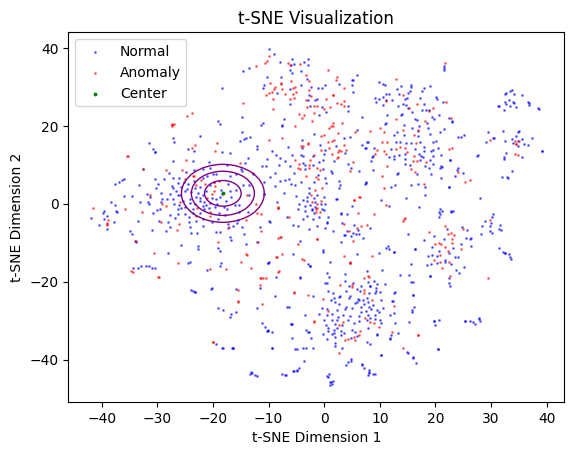

ROC AUC score: 49.52


In [6]:
from test import eval

labels, scores = eval(deep_SVDD.net, deep_SVDD.c, data[1], device)

Scores (Inliers): [ 1.335754    2.1576467   1.6052085   1.1895192   0.8076842   3.211075
  0.8053706   0.55817     1.7483466   0.867978    8.904825    0.42989683
  1.1546395   3.467196    1.4169139   1.1909871   1.071902    9.598387
  5.1653013   0.39067757  3.0044396   0.51218766  0.32150936  1.9510838
  1.9967735   2.5884895   1.7753177  10.365581    0.4165027   2.977435
  1.5727572   0.32445544  1.9973845   0.5483879   6.828617    3.1061535
  4.6069865   0.5331819   0.6284349   0.7806932   5.1333523   0.31198248
  0.39639455  0.7198215   0.7046655   0.6542389   2.1157417   1.8168967
  5.2127047   1.3045118   0.32165197  1.9643495   0.516332    1.0792044
  1.5721214   0.57207316  7.722543    2.3265364   2.4140615   5.1421924
  1.4750631   0.5672178   2.452392    0.9132646   0.7506298   3.4448109
  1.4219247   1.7736276   0.4268111  12.421631    6.3767443   0.89788336
  0.6301424   0.78758377  0.61567223  1.0912004   7.1114807   0.5338084
  0.45133585  4.0515804   2.8529656   8.632188

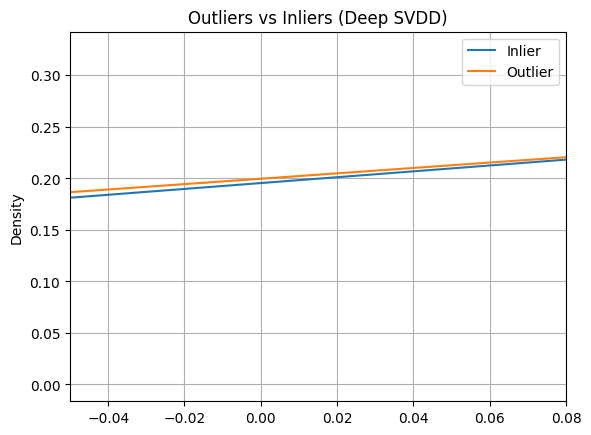

In [7]:
import matplotlib.pyplot as plt
import pandas as pd 

scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]

# Print scores_in and scores_out
print("Scores (Inliers):", scores_in)
print("Scores (Outliers):", scores_out)


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
plt.xlim(-0.05, 0.08)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()